In [1]:
import rpy2
import scanpy as sc
import numpy as np
import os

In [2]:
#-- set R HOME 
os.environ['R_HOME'] = '/home/nehard/anaconda3/envs/loompy/lib/R'

In [3]:
%load_ext rpy2.ipython

In [4]:
print(rpy2.__version__)

2.9.4


In [5]:
sc.settings.verbosity = 3
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [6]:
from rpy2.robjects import r


In [13]:
%%R #-o test
suppressPackageStartupMessages(library(dplyr))
test <- read.table('../LifeSpan/61SamplesV2_Oct2019/meta_LifeSpan_61samples.txt', sep="\t", header =T, row.names=1)
head(test)


        Groups Batches Sample_ids Age Gender Names
JB18001     HI      B1 HC_NCH_111 14M      M  HI_1
JB18002     HI      B1 HC_NCH_114  6M      M  HI_2
JB18003     HI      B1 HC_NCH_112 11M      F  HI_3
JB18004     HI      B1 HC_NCH_116  3M      F  HI_4
JB18005     HI      B1 HC_NCH_117  2M      F  HI_5
JB18006     HI      B1 HC_NCH_118 10M      M  HI_6


In [9]:
%%R
suppressPackageStartupMessages(library(devtools))

In [10]:
%%R
suppressPackageStartupMessages(library(ggplot2))

In [26]:

import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

/home/nehard/anaconda3/envs/loompy/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


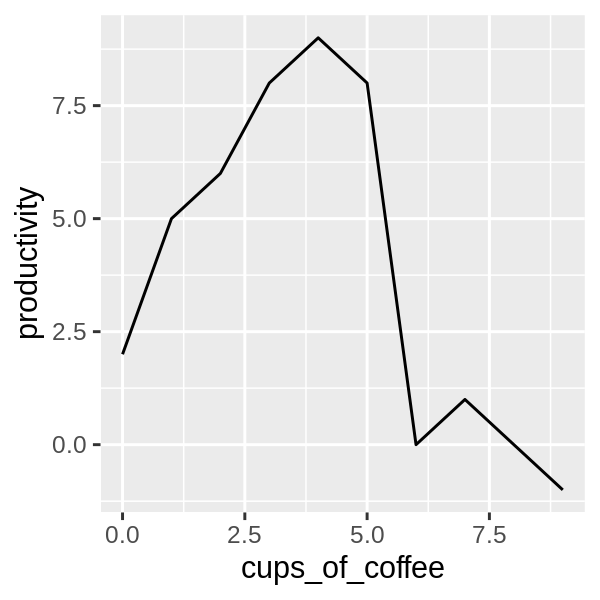

In [27]:
%%R -i df -w 3 -h 3 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()